In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(rc={'figure.figsize': [15, 15]}, font_scale=1)

In [2]:
# Read data
df = pd.read_csv("train.csv")
DF = pd.read_csv("test.csv")

In [3]:
# check null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
DF.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Data Analysis

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.groupby('Survived').count()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,,
0,549,549,549,549,424,549,549,549,549,68,549
1,342,342,342,342,290,342,342,342,342,136,340


In [9]:
df.groupby('Pclass').count()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,,
1,216,216,216,216,186,216,216,216,216,176,214
2,184,184,184,184,173,184,184,184,184,16,184
3,491,491,491,491,355,491,491,491,491,12,491


In [10]:
df.groupby('Embarked').count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
Embarked,,,,,,,,,,,
C,168,168,168,168,168,130,168,168,168,168,69
Q,77,77,77,77,77,28,77,77,77,77,4
S,644,644,644,644,644,554,644,644,644,644,129


### Calculate the percent of each class (Pclass & Survived & Embarked)

In [11]:
# Analysis
print(f"Pclass(1):{(216 / df.shape[0]) * 100}")
print(f"Pclass(2):{(184 / df.shape[0]) * 100}")
print(f"Pclass(3):{(491 / df.shape[0]) * 100}")
print(20*'-')
print(f"Survived(1):{(342 / df.shape[0]) * 100}")
print(f"Survived(0):{(549 / df.shape[0]) * 100}")
print(20*'-')
print(f"Male:{(577 / df.shape[0]) * 100}")
print(f"Female:{(314 / df.shape[0]) * 100}")
print(20*'-')
print(f"Embarked(C):{(168 / df.shape[0]) * 100}")
print(f"Embarked(Q):{(77 / df.shape[0]) * 100}")
print(f"Embarked(S):{(644 / df.shape[0]) * 100}")

Pclass(1):24.242424242424242
Pclass(2):20.65095398428732
Pclass(3):55.106621773288445
--------------------
Survived(1):38.38383838383838
Survived(0):61.61616161616161
--------------------
Male:64.75869809203144
Female:35.24130190796858
--------------------
Embarked(C):18.855218855218855
Embarked(Q):8.641975308641975
Embarked(S):72.27833894500561


# Data Visualization

In [12]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### distplot: The distplot shows the distribution of a univariate set of observations.

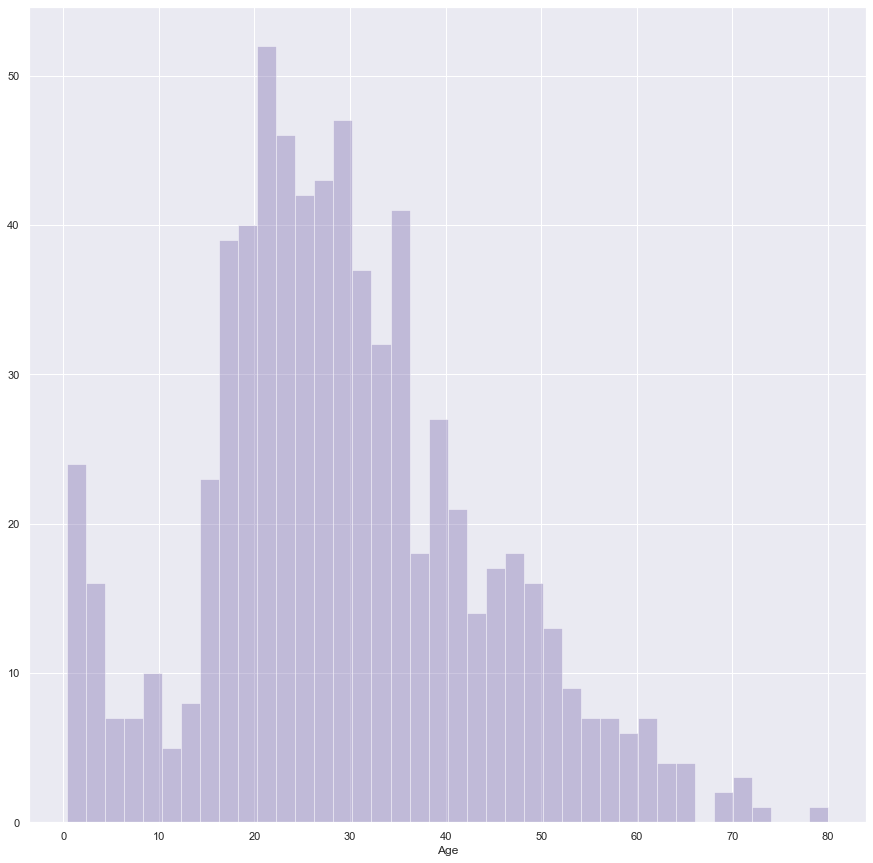

In [13]:
sns.distplot(df['Age'], kde=False, bins=40, color='m')

#### kdeplot: These KDE plots replace every single observation with a Gaussian (Normal) distribution centered around that value.

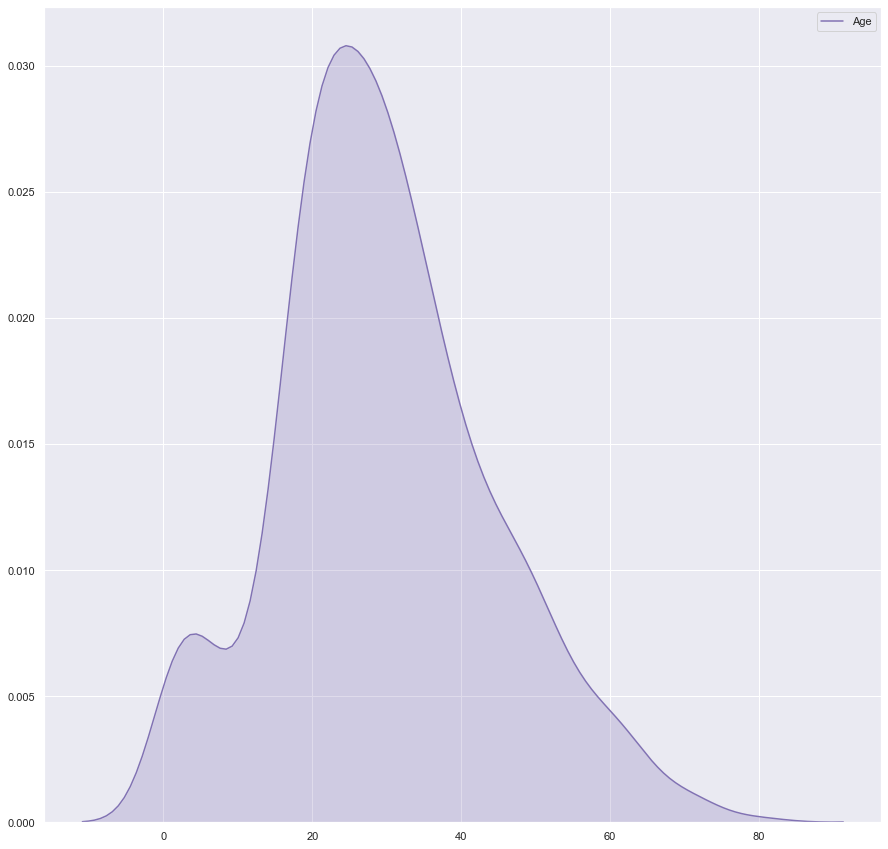

In [14]:
sns.kdeplot(df['Age'],shade=True, color='m')

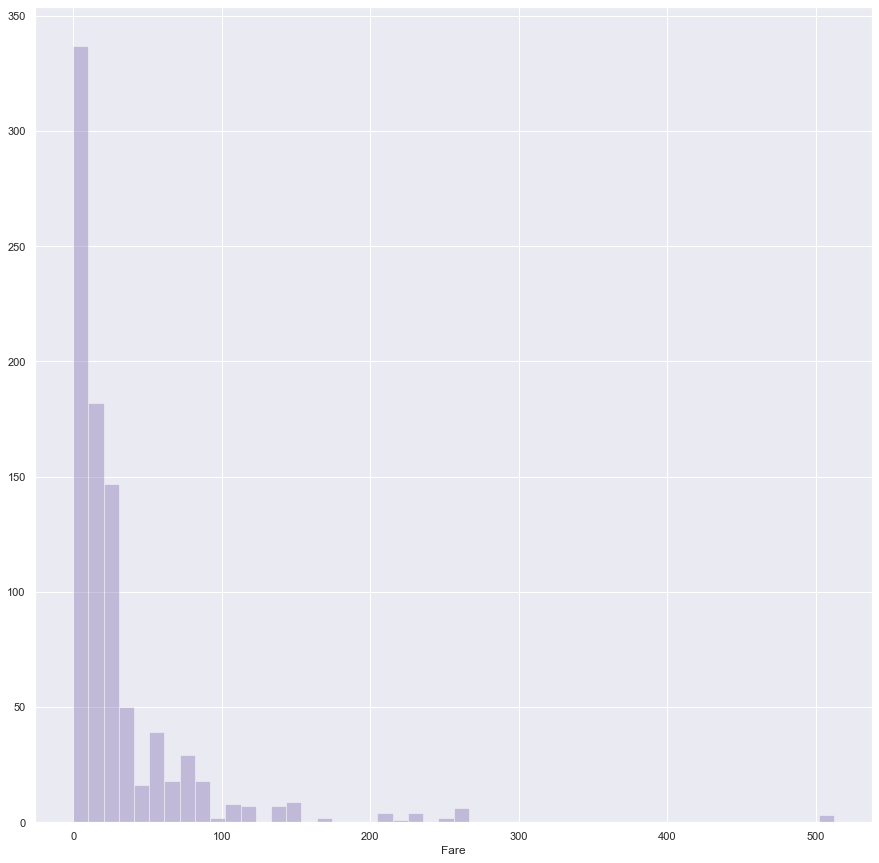

In [15]:
sns.distplot(df['Fare'], kde=False, color='m')

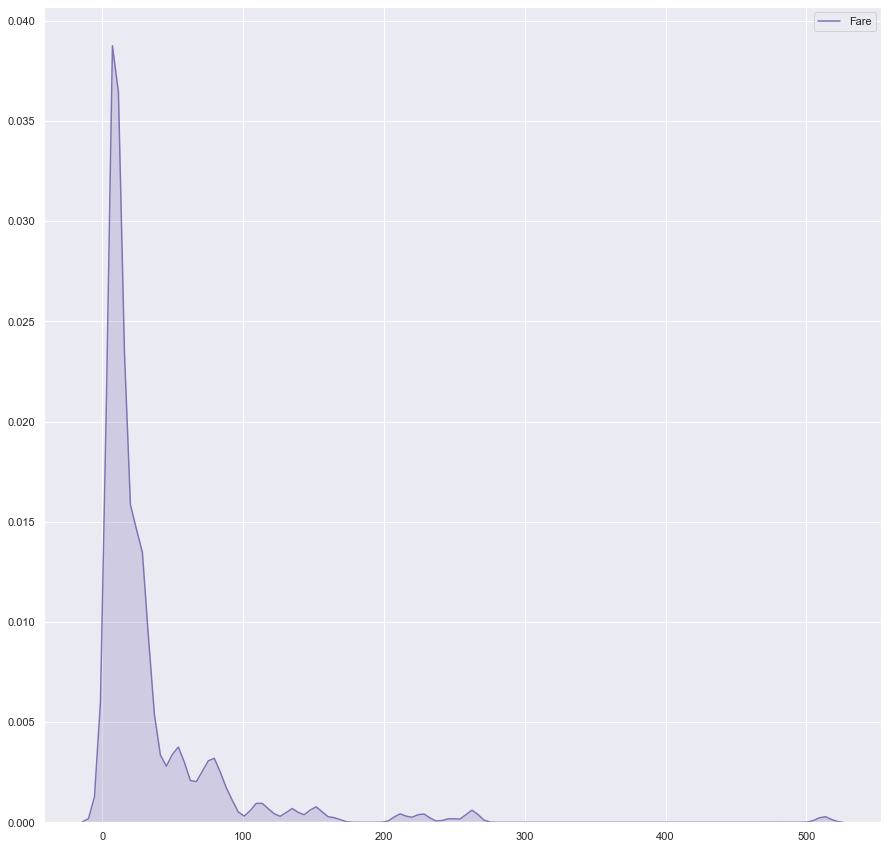

In [16]:
sns.kdeplot(df['Fare'], shade=True, color='m')

#### joinplot: allows you to basically match up two distplots for bivariate data. With your choice of what kind parameter to compare

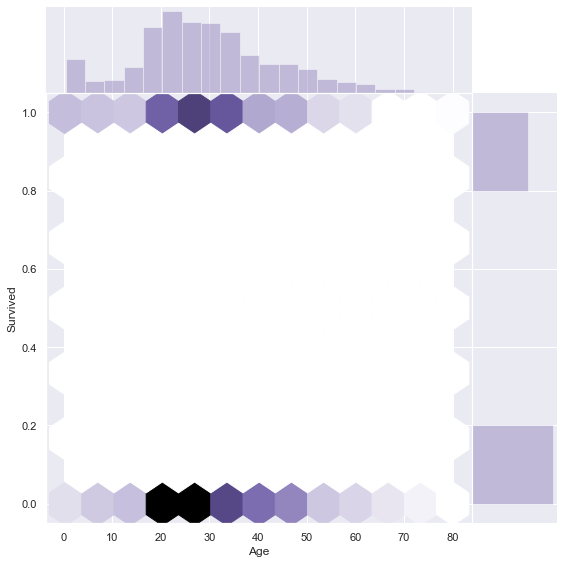

In [17]:
sns.jointplot(x='Age', y='Survived', data=df, kind='hex', height=8, space=0, color='m')

### boxplot: 
shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

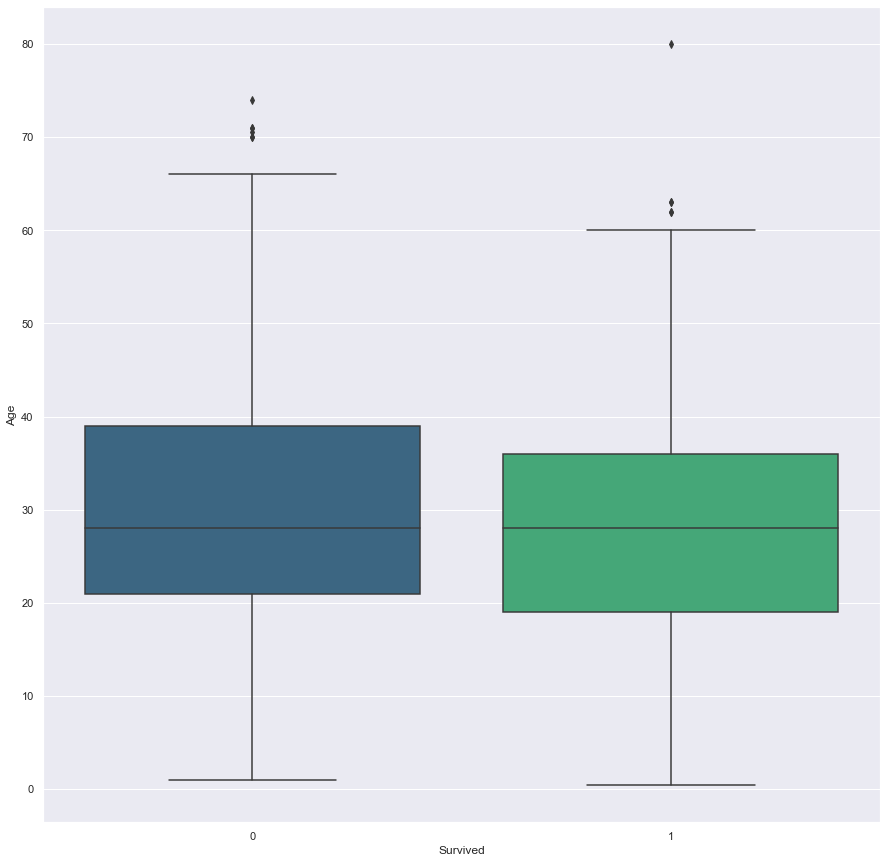

In [18]:
sns.boxplot(x="Survived", y="Age", data=df, palette='viridis')

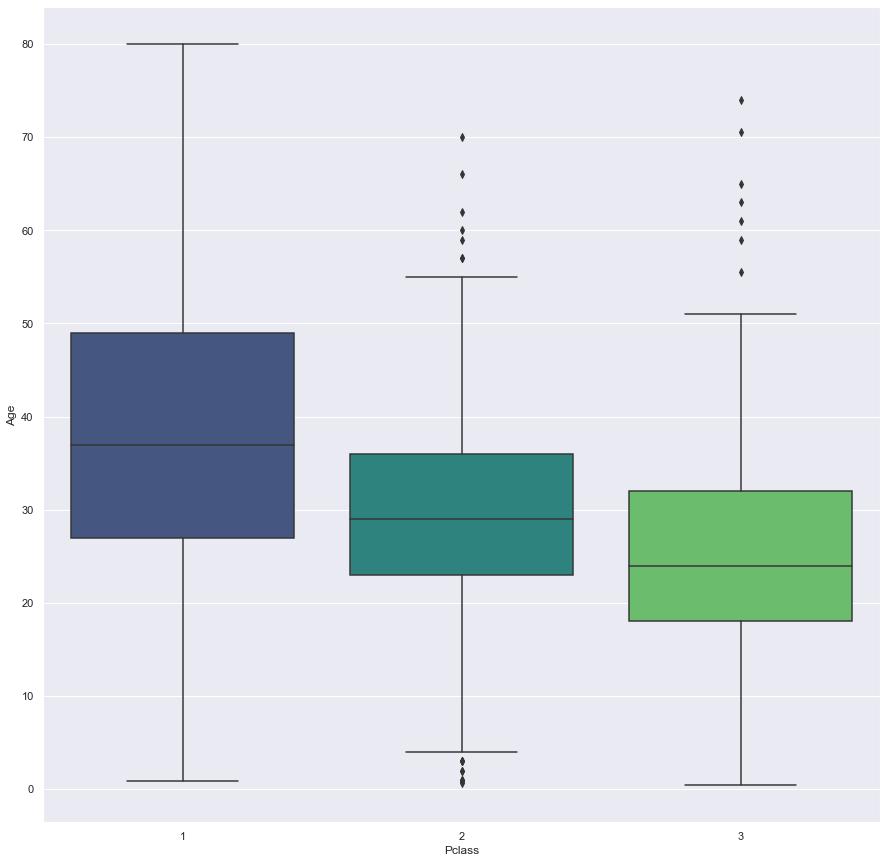

In [19]:
sns.boxplot(x="Pclass", y="Age", data=df, palette='viridis')

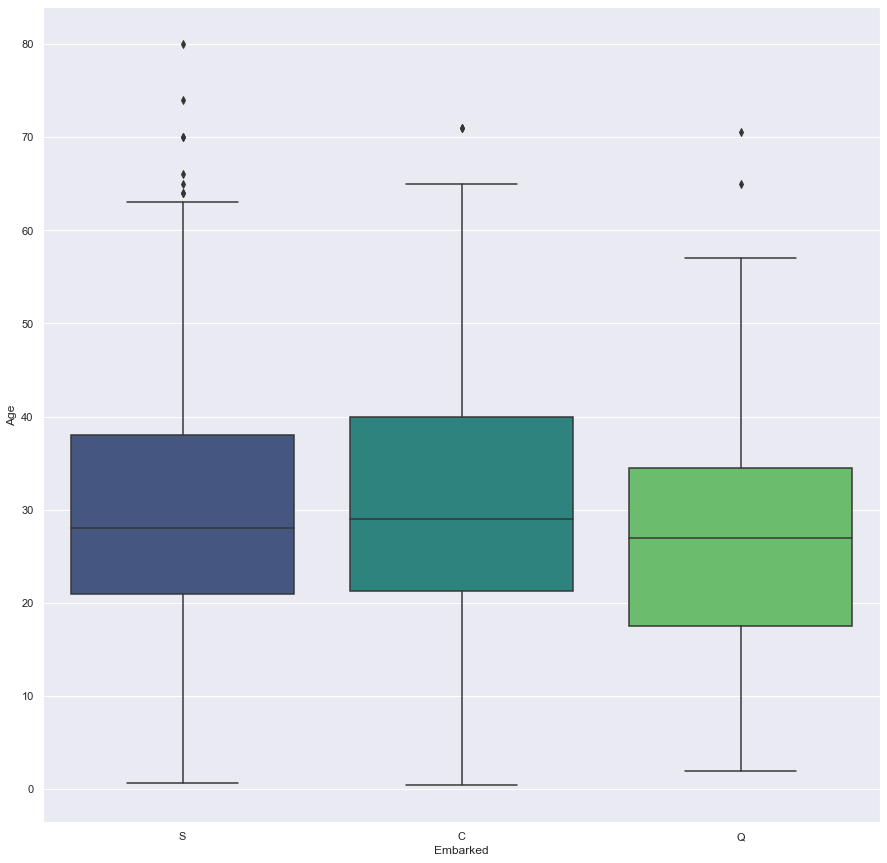

In [20]:
sns.boxplot(x="Embarked", y="Age", data=df, palette='viridis')

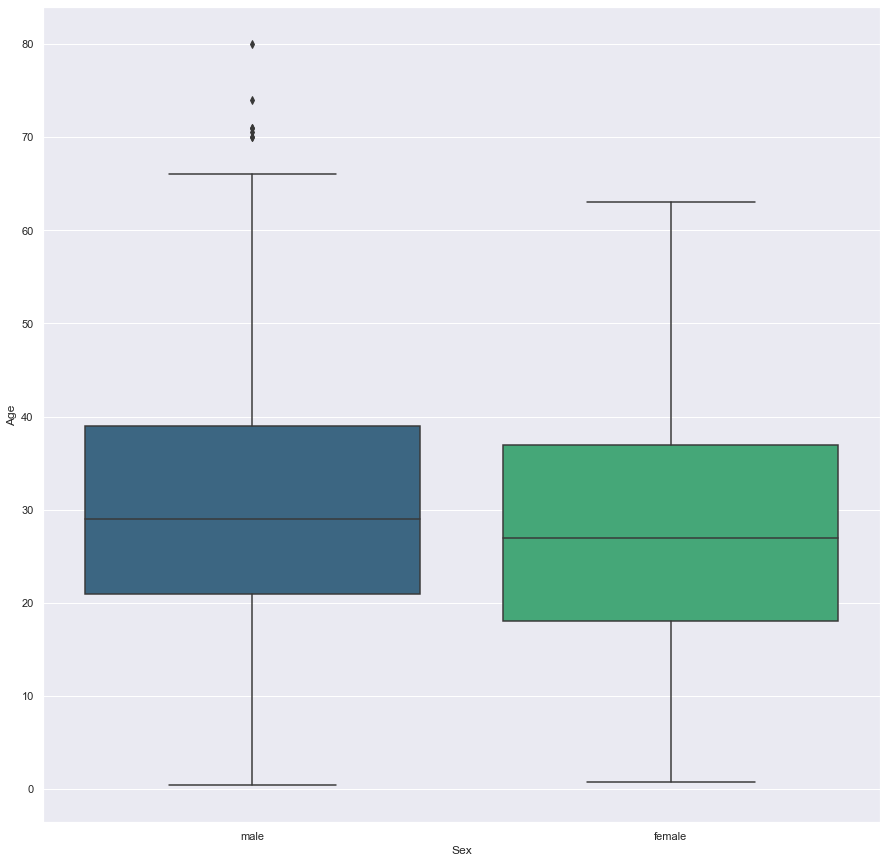

In [21]:
sns.boxplot(x="Sex", y="Age", data=df, palette='viridis')

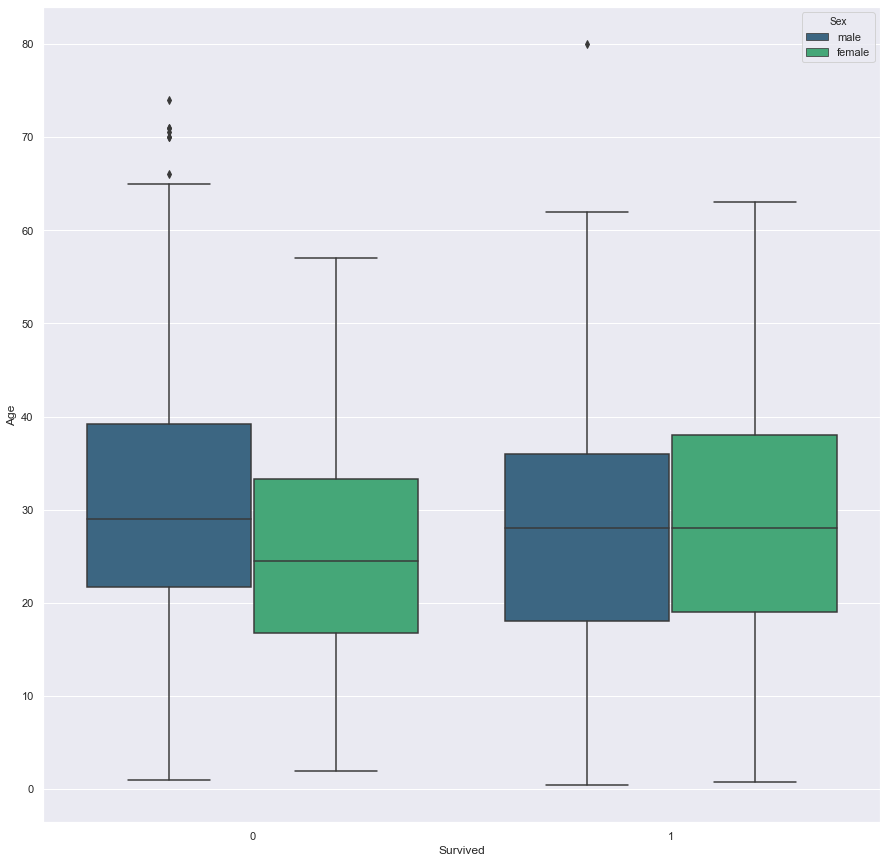

In [22]:
sns.boxplot(x="Survived", y="Age", hue="Sex", data=df, palette='viridis')

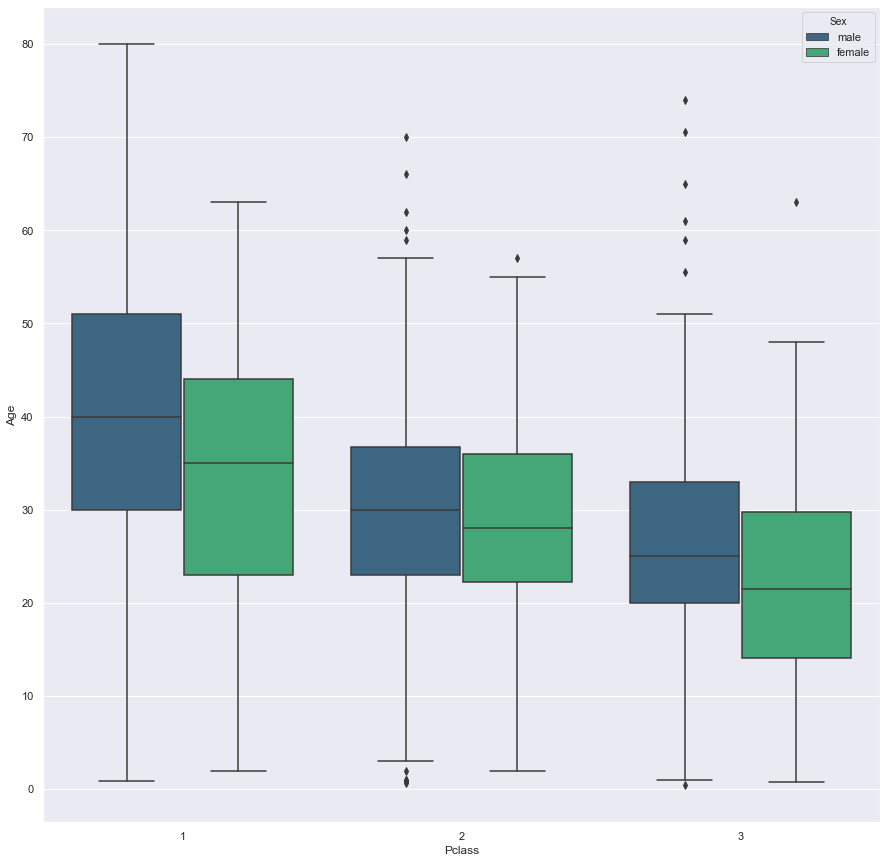

In [23]:
sns.boxplot(x="Pclass", y="Age", hue="Sex", data=df, palette='viridis')

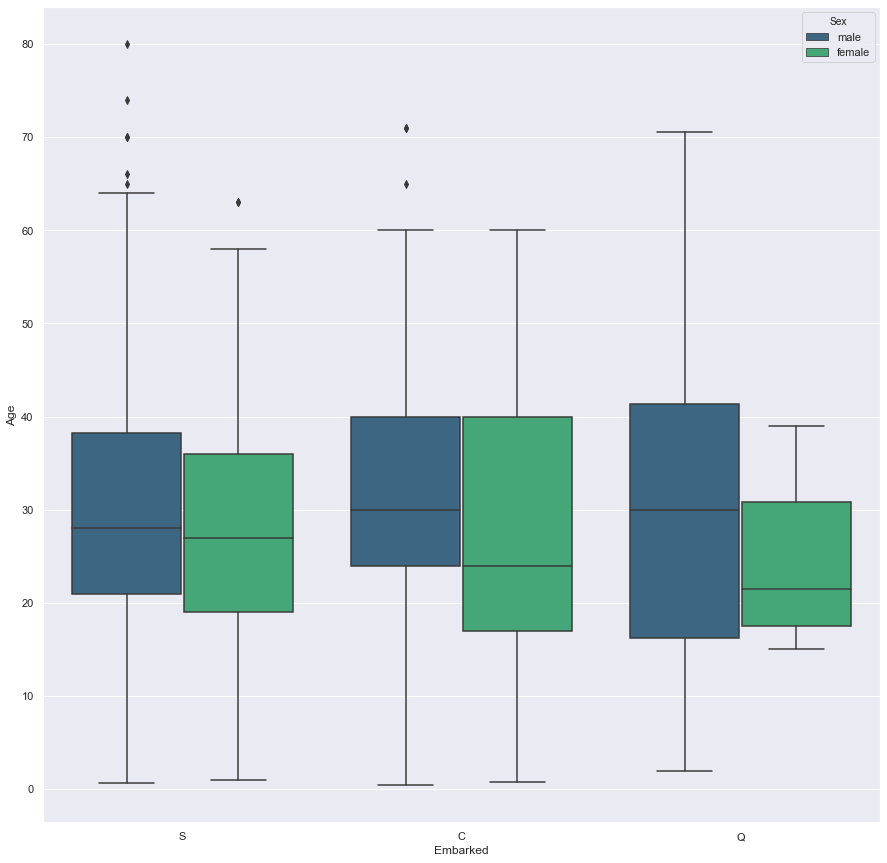

In [24]:
sns.boxplot(x="Embarked", y="Age", hue="Sex", data=df, palette='viridis')

### violinplot:
A violin plot plays a similar role as a box and whisker plot. It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.

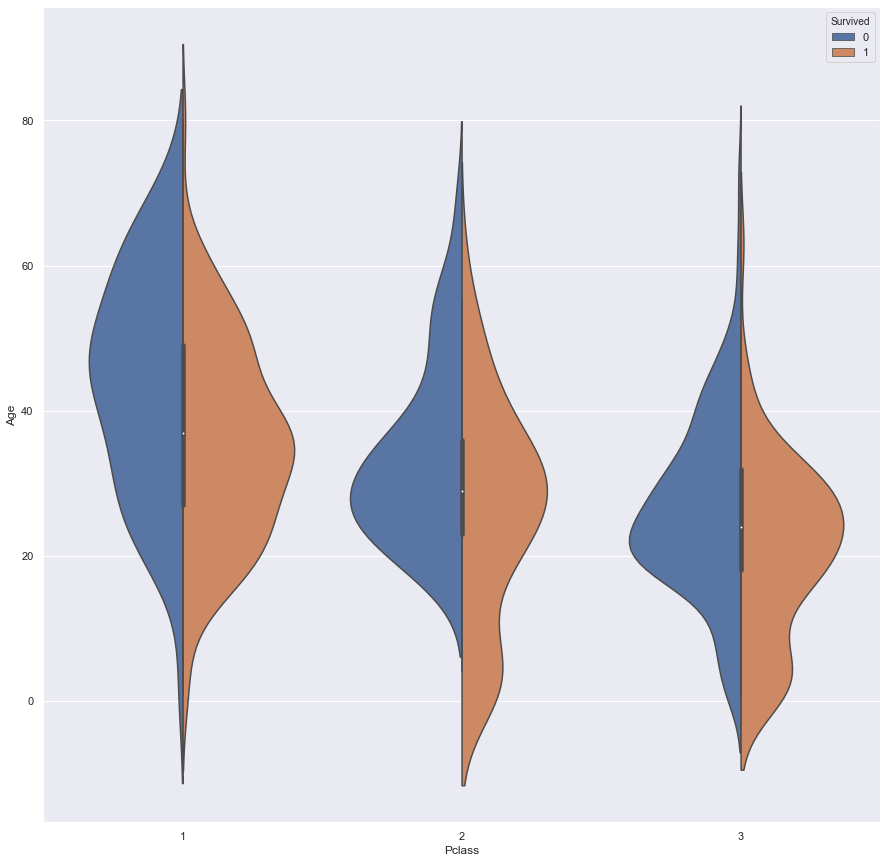

In [25]:
sns.violinplot(x='Pclass', y='Age', data=df, hue='Survived', split=True)

### stripplot:
The stripplot will draw a scatterplot where one variable is categorical. A strip plot can be drawn on its own, but it is also a good complement to a box or violin plot in cases where you want to show all observations along with some representation of the underlying distribution.

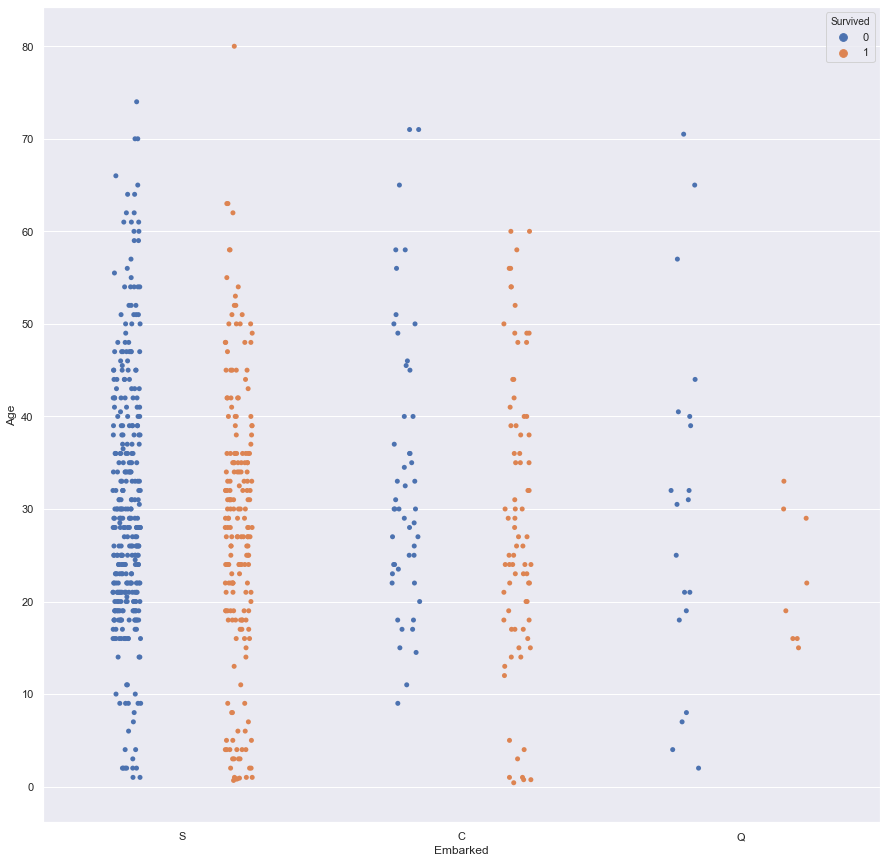

In [26]:
sns.stripplot(x='Embarked', y='Age', data=df, hue='Survived', dodge=True)

### swarmplot:
swarmplot draw a categorical scatterplot with non-overlapping points. This function is similar to stripplot() , but the points are adjusted (only along the categorical axis) so that they don't overlap. It can give a better representation of the distribution of observations, although it only works well for relatively small datasets.

C:\Users\A.S.A\anaconda3\lib\site-packages\seaborn\categorical.py:1326: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\A.S.A\anaconda3\lib\site-packages\seaborn\categorical.py:1330: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


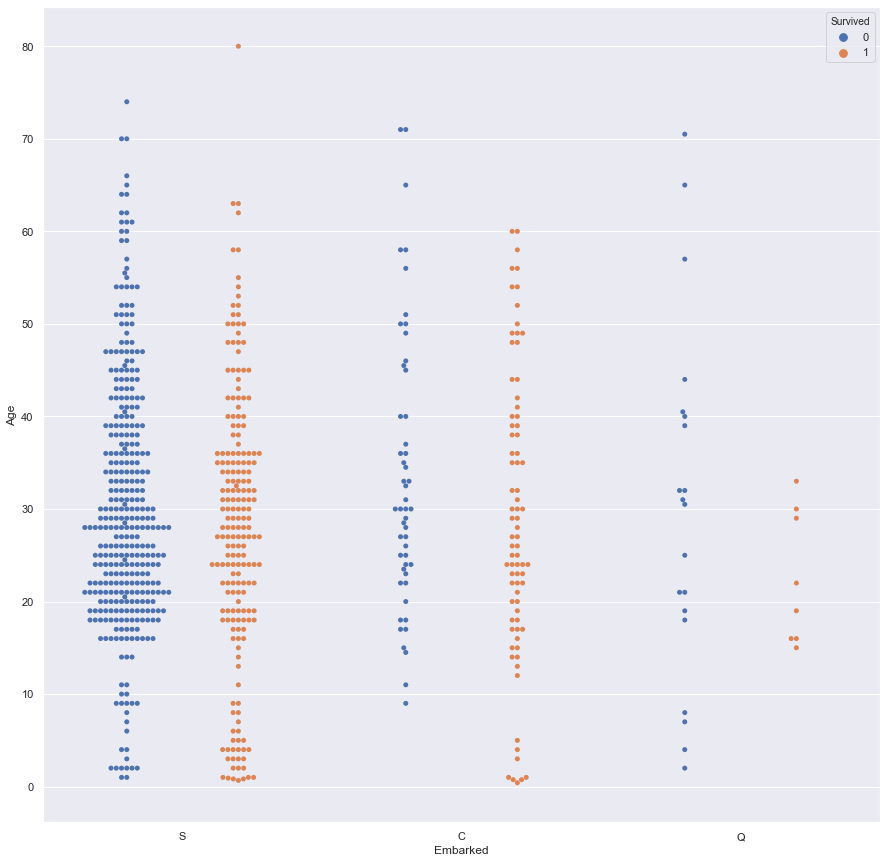

In [27]:
sns.swarmplot(x='Embarked', y='Age', data=df, hue='Survived', dodge=True)

### Heatmap

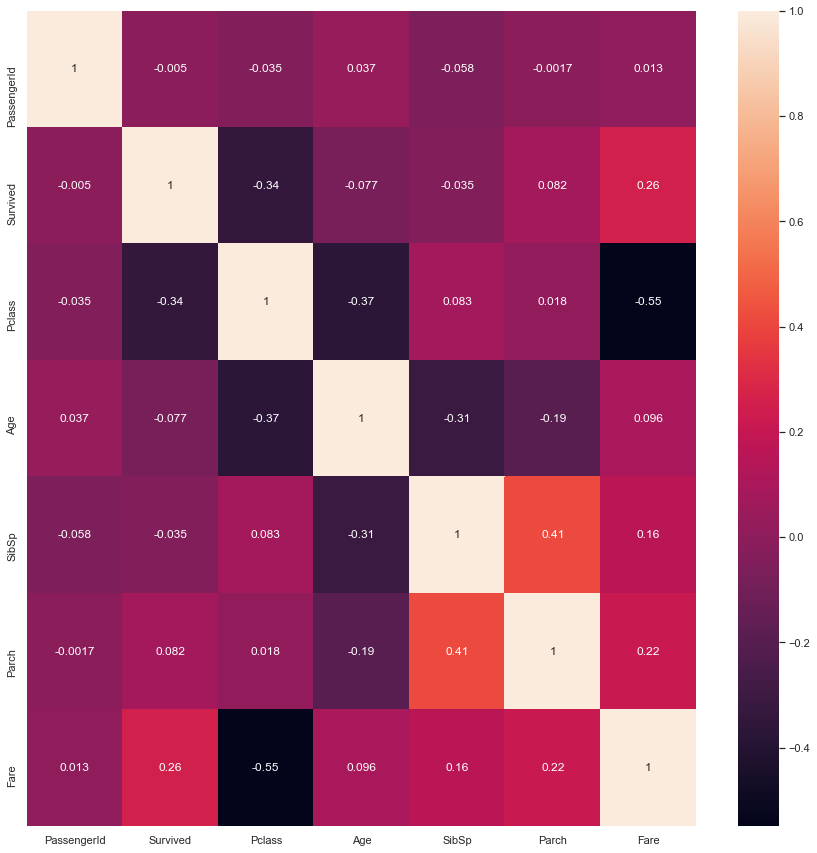

In [28]:
sns.heatmap(df.corr(), annot=True)

### countplot

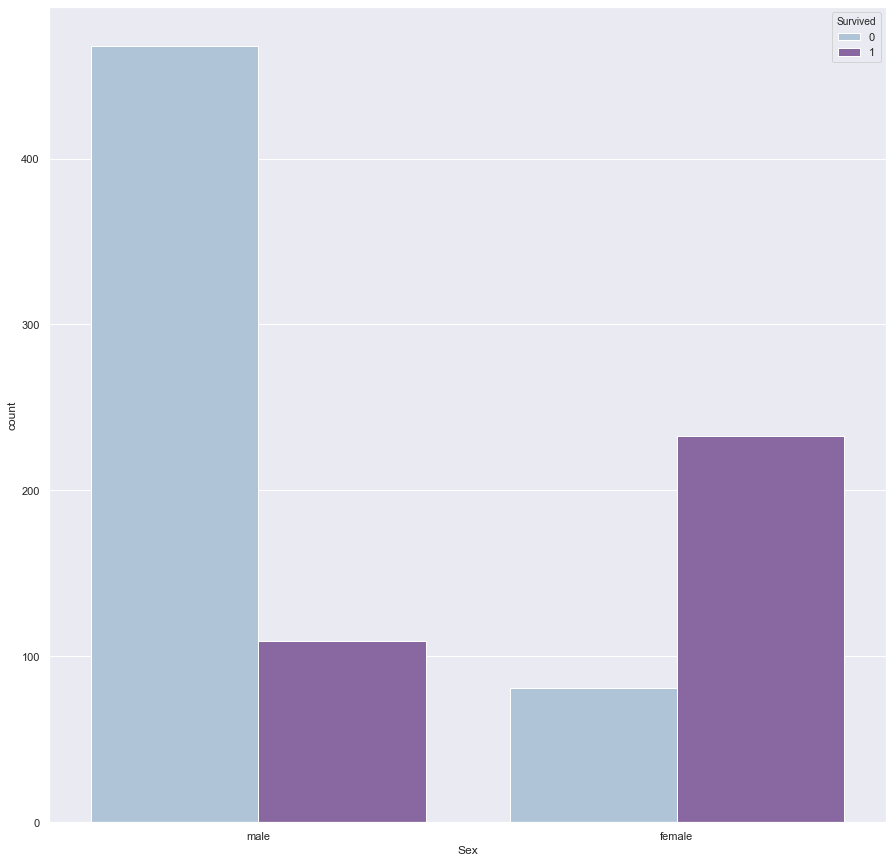

In [29]:
sns.countplot(x='Sex', data=df, hue="Survived", palette='BuPu')

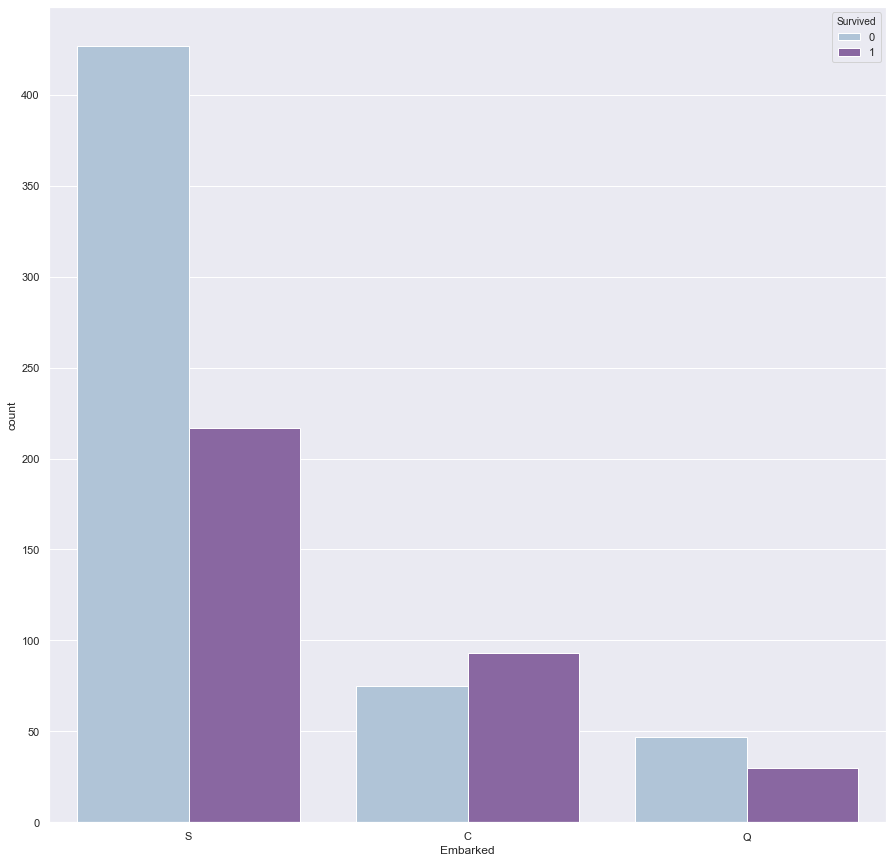

In [30]:
sns.countplot(x='Embarked', data=df, hue="Survived", palette='BuPu')

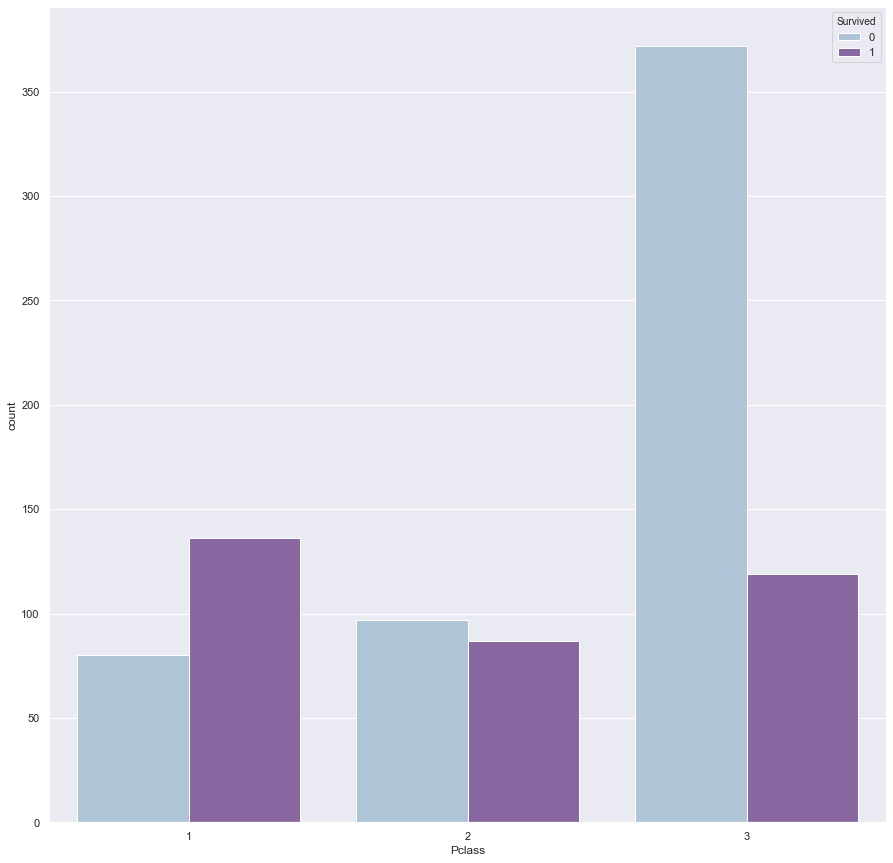

In [31]:
sns.countplot(x='Pclass', data=df, hue="Survived", palette='BuPu')

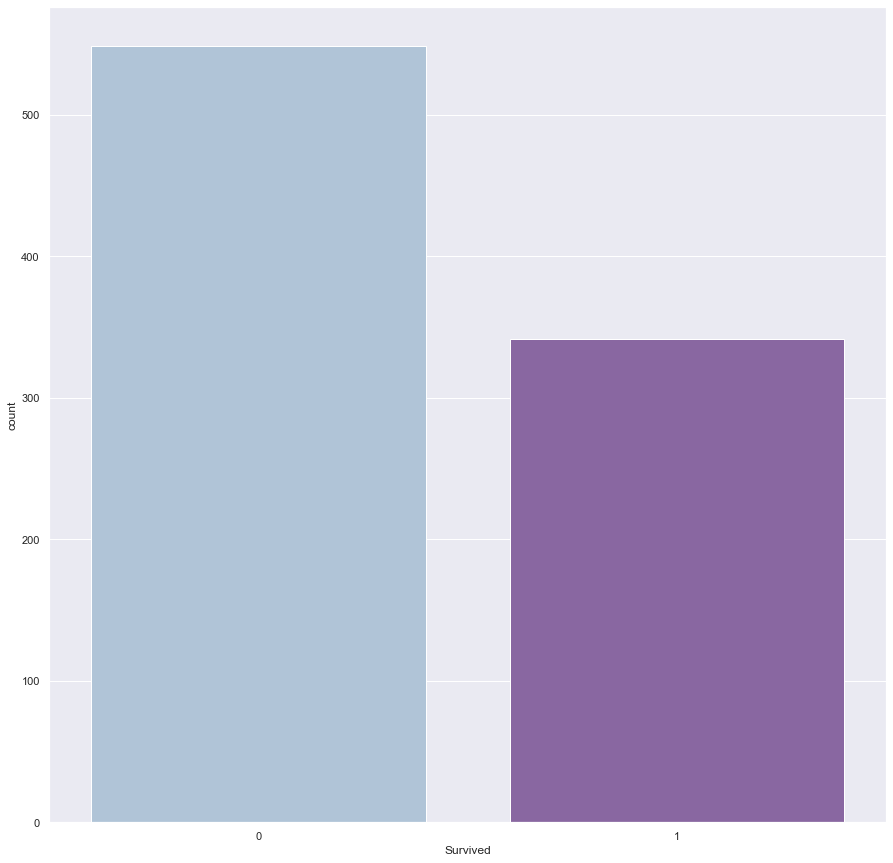

In [32]:
sns.countplot(x='Survived', data=df, palette='BuPu')

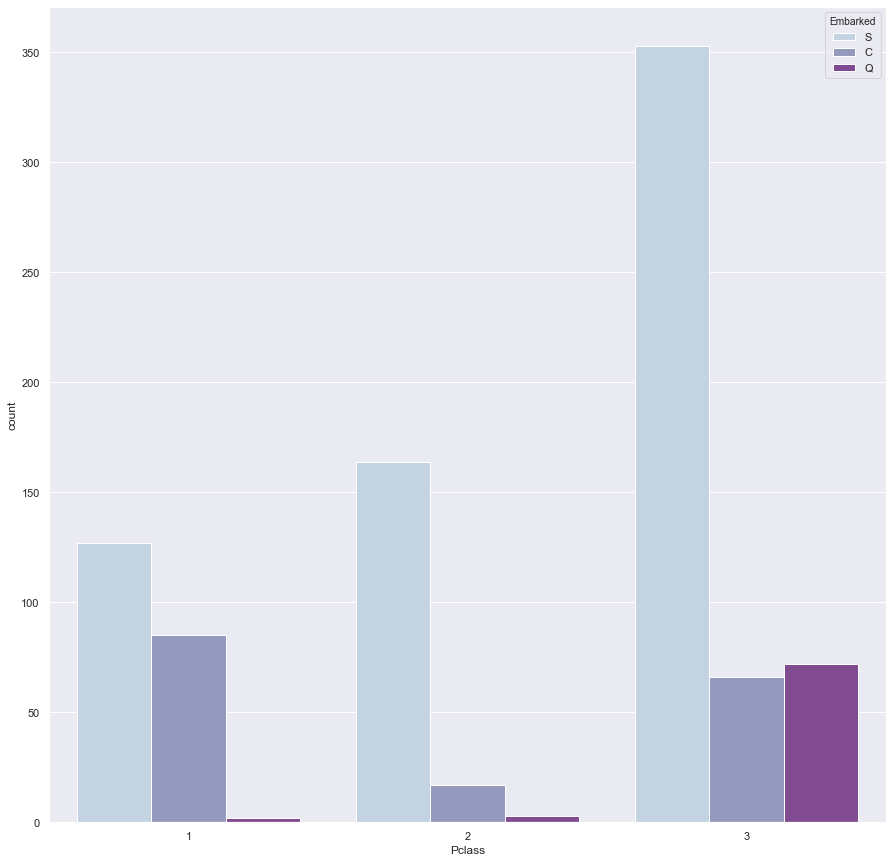

In [33]:
sns.countplot(x='Pclass', data=df, hue='Embarked', palette='BuPu')

# Data Preprocessing

In [34]:
# calculate the percentage of data is missing
print(f"Age:{(df.Age.isnull().sum() / df.shape[0]) * 100}")
print(f"Cabin:{(df.Cabin.isnull().sum() / df.shape[0]) * 100}")

Age:19.865319865319865
Cabin:77.10437710437711


### the missing data(Age) = 20%
##### so can't risk losing all of the data
### the missing data(Cabin) = 77%
##### so can't fill the lose all of the data by predict

In [35]:
# Data preprocessing
df.drop(['PassengerId','Name','Cabin','Ticket','Fare','SibSp','Parch'], axis=1, inplace=True)
df.dropna(axis = 0,subset=['Embarked'],how='any',inplace=True)


ID = DF['PassengerId']
DF.drop(['PassengerId','Name','Cabin','Ticket','Fare','SibSp','Parch'], axis=1, inplace=True)

df['Age'].fillna(df['Age'].median(), inplace=True)
DF['Age'].fillna(df['Age'].median(), inplace=True)
# DF['Fare'].fillna(df['Fare'].median(), inplace=True)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   Embarked  889 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 41.7+ KB


In [37]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   Embarked  418 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 13.2+ KB


In [38]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Embarked    0
dtype: int64

In [39]:
DF.isnull().sum()

Pclass      0
Sex         0
Age         0
Embarked    0
dtype: int64

# Work with Nominal Features with pandas `get_dummies` method.

In [40]:
# One Hot encoding
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)
DF = pd.get_dummies(DF, columns=['Sex', 'Embarked'], drop_first=True)

<img src='https://miro.medium.com/max/1400/1*hZLqbZqqrwiqkGxxl2vYkg.png'>

In one hot encoding, a new binary (dummy) variable is created for each unique value in the categorical variable. For example In the chart above, we had three unique colors and so we create three new features, one for each color. If the value is true, the integer 1 is placed in the field, if false then a 0.

##### we use drop_first to get k-1 features, due to the last feature will be redundant and correlated with other features so it can cause problems.

In [41]:
df.head()

,Survived,Pclass,Age,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,1
1,1,1,38.0,0,0,0
2,1,3,26.0,0,0,1
3,1,1,35.0,0,0,1
4,0,3,35.0,1,0,1


In [42]:
DF.head()

,Pclass,Age,Sex_male,Embarked_Q,Embarked_S
0,3,34.5,1,1,0
1,3,47.0,0,0,1
2,2,62.0,1,1,0
3,3,27.0,1,0,1
4,3,22.0,0,0,1


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    889 non-null    int64  
 1   Pclass      889 non-null    int64  
 2   Age         889 non-null    float64
 3   Sex_male    889 non-null    uint8  
 4   Embarked_Q  889 non-null    uint8  
 5   Embarked_S  889 non-null    uint8  
dtypes: float64(1), int64(2), uint8(3)
memory usage: 30.4 KB


# outliers Handling

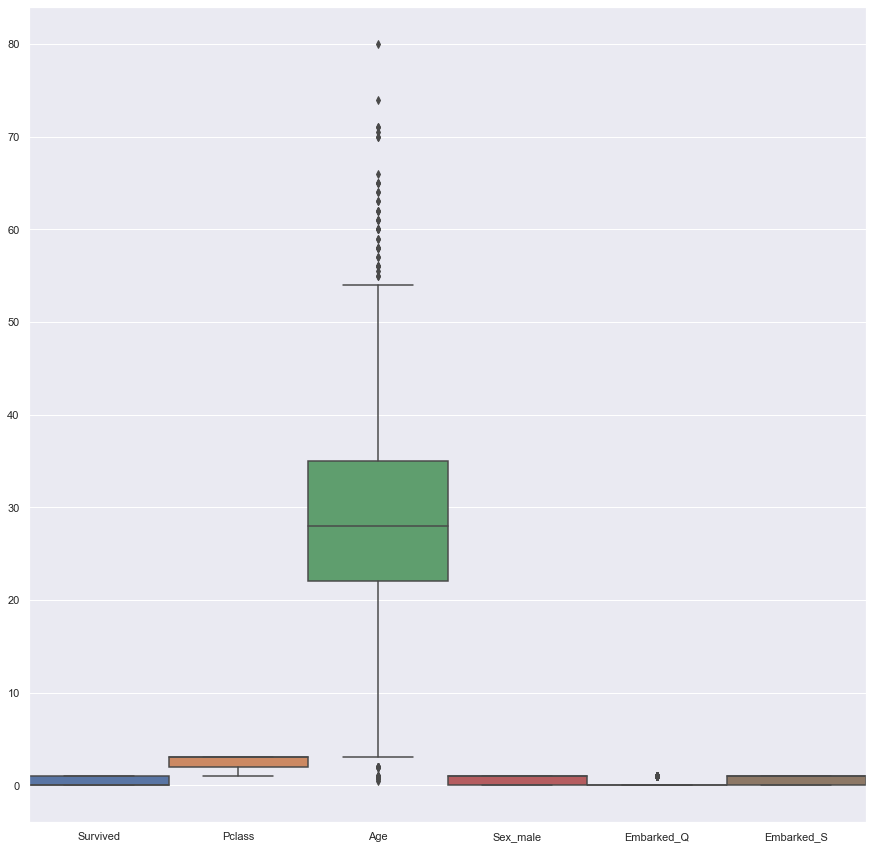

In [44]:
# check outliers
sns.boxplot(data=df,width=1)

### Standard Deviation Method

In [45]:
# columns = ['Pclass','Age','SibSp','Parch','Fare','Sex_male','Embarked_Q','Embarked_S']
# for col in columns:
#     # calculate summary statistics
#     df_mean, df_std = np.mean(df[col]), np.std(df[col])
    
#     # identify outliers
#     cut_off = df_std * 3
#     lower, upper = df_mean - cut_off, df_mean + cut_off
    
#     # remove outliers
#     outliers = ( ( df[col] < lower) | (df[col] > upper) )
#     index_label = df[outliers].index
    
#     print(f'Number of outliers in {col}: {len(index_label)}')
#     df.drop(index_label, inplace=True)

### Interquartile Range Method

In [46]:
columns = ['Pclass','Age','SibSp','Parch','Fare','Sex_male','Embarked_Q','Embarked_S']
for col in columns:
    # calculate interquartile range
    q25, q75 = np.percentile(df['Age'], 25), np.percentile(df['Age'], 75)
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    # identify outliers
    outliers = ( ( df['Age'] < lower) | (df['Age'] > upper) )
    index_label = df[outliers].index
    print(f'Number of outliers in {col}: {len(index_label)}')
    df.drop(index_label, inplace=True)

Number of outliers in Pclass: 65
Number of outliers in Age: 15
Number of outliers in SibSp: 49
Number of outliers in Parch: 33
Number of outliers in Fare: 0
Number of outliers in Sex_male: 0
Number of outliers in Embarked_Q: 0
Number of outliers in Embarked_S: 0


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 727 entries, 0 to 890
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    727 non-null    int64  
 1   Pclass      727 non-null    int64  
 2   Age         727 non-null    float64
 3   Sex_male    727 non-null    uint8  
 4   Embarked_Q  727 non-null    uint8  
 5   Embarked_S  727 non-null    uint8  
dtypes: float64(1), int64(2), uint8(3)
memory usage: 24.8 KB


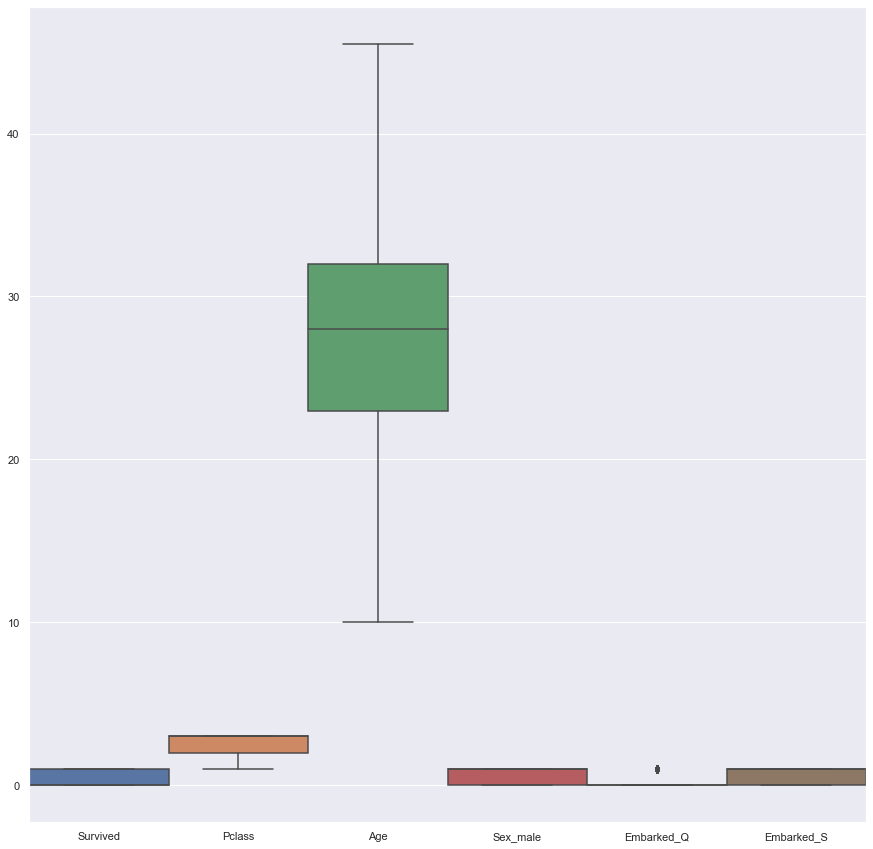

In [48]:
# check outliers
sns.boxplot(data=df,width=1)

# Data Split to Train and Test Sets

In [49]:
# Read train data(Slicing)
Y  = df.iloc[:,:1]
X  = df.iloc[:,1:]
m  = len(Y)

In [50]:
print(X)
print(Y)

     Pclass   Age  Sex_male  Embarked_Q  Embarked_S
0         3  22.0         1           0           1
1         1  38.0         0           0           0
2         3  26.0         0           0           1
3         1  35.0         0           0           1
4         3  35.0         1           0           1
..      ...   ...       ...         ...         ...
886       2  27.0         1           0           1
887       1  19.0         0           0           1
888       3  28.0         0           0           1
889       1  26.0         1           0           0
890       3  32.0         1           1           0

[727 rows x 5 columns]
     Survived
0           0
1           1
2           1
3           1
4           0
..        ...
886         0
887         1
888         0
889         1
890         0

[727 rows x 1 columns]


In [51]:
print(X.shape)
print(Y.shape)
print(m)

(727, 5)
(727, 1)
727


# Feature Scaling

### Standardization

In [52]:
# Standardization
X  = (X - X.mean()) / (X.std())
DF = (DF - DF.mean()) / (DF.std())

### Normalization

In [53]:
# Normalization
# X   = (X-X.min()) / (X.max()-X.min())
# DF  = (DF-DF.min())  / (DF.max()-DF.min())

In [54]:
# Add the one's columns
X_train = np.hstack([np.ones(Y.shape) , X])
X_test  = np.hstack([np.ones((DF.shape[0],1)) , DF])

In [55]:
print(X_train.shape)
print(X_test.shape)

(727, 6)
(418, 6)


In [56]:
X_train

array([[ 1.        ,  0.75893042, -0.8226073 ,  0.73008293, -0.32618759,
         0.62411604],
       [ 1.        , -1.71525081,  1.38671343, -1.36782336, -0.32618759,
        -1.6000622 ],
       [ 1.        ,  0.75893042, -0.27027711, -1.36782336, -0.32618759,
         0.62411604],
       ...,
       [ 1.        ,  0.75893042,  0.00588798, -1.36782336, -0.32618759,
         0.62411604],
       [ 1.        , -1.71525081, -0.27027711,  0.73008293, -0.32618759,
        -1.6000622 ],
       [ 1.        ,  0.75893042,  0.55821816,  0.73008293,  3.06150357,
        -1.6000622 ]])

In [57]:
X_test

array([[ 1.        ,  0.87243644,  0.37061789,  0.75502418,  2.8403538 ,
        -1.3490589 ],
       [ 1.        ,  0.87243644,  1.35735852, -1.32129232, -0.35122655,
         0.73948414],
       [ 1.        , -0.31544119,  2.54144728,  0.75502418,  2.8403538 ,
        -1.3490589 ],
       ...,
       [ 1.        ,  0.87243644,  0.68637489,  0.75502418, -0.35122655,
         0.73948414],
       [ 1.        ,  0.87243644, -0.14248724,  0.75502418, -0.35122655,
         0.73948414],
       [ 1.        ,  0.87243644, -0.14248724,  0.75502418, -0.35122655,
        -1.3490589 ]])

In [58]:
def sigmoid(input):
    output = 1/(1+np.exp(-input)) 
    return output

In [59]:
def cost_function(theta, x, y):
    h = sigmoid(np.dot(x, theta.T))  
    J = (-1/m) * (np.sum(y*(np.log(h))+(1-y)*(np.log(1-h))))
    return J

In [60]:
def gradientDecsent(iterations, alpha , x, y):
#     theta = np.random.rand(1,x.shape[1])
    theta = np.full((1, x.shape[1]), 0)
    cost_history = []
    for i in range(iterations):
        theta = theta - (alpha / m) * np.transpose(sigmoid(np.dot(x, theta.T)) - y).dot(x)
        cost_history.append(cost_function(theta,x,y))
        if i%100 == 0 :
            print(cost_function(theta,x,y))
    return theta, cost_history

In [61]:
X_train = np.array(X_train)
Y = np.array(Y)
theta,cost_history = gradientDecsent(1000,0.1,X_train,Y)
print(theta)

0.6800340793855971
0.4384116343119664
0.4305103851687778
0.429648810747334
0.42952460574304846
0.4295048113236149
0.4295014880485245
0.42950090432974014
0.4295007958160107
0.4295007740355152
[[-0.78490822 -0.87954541 -0.05269577 -1.29949022  0.00398321 -0.27525704]]


# Regularization

In [62]:
# def sigmoid(input):
#     output= 1/(1+np.exp(-input))
#     return output

In [63]:
# def cost_function(x,theta,y,lmda):
#     h = sigmoid(np.dot(x, theta.T))
#     J = ( -1/m * np.sum(y*np.log(h) + (1-y) * np.log(1-h)) ) + lmda/(2*m) * np.sum( theta**2 ) 
#     return J

In [64]:
# def gradientDecsent(iterations, alpha , lmda , x, y):
# #     theta=np.random.rand(1,x.shape[1])
#     theta = np.full((1, x.shape[1]), 0)
#     cost_history = []
#     for i in range(iterations):
#         theta = theta * ( 1 - ( (alpha*lmda)/m ) ) - (alpha / m) * np.transpose(sigmoid(np.dot(x, theta.T)) - y).dot(x)
#         cost_history.append(cost_function(x,theta,y,lmda))
#         if i%100 == 0 :
#             print(cost_function(x,theta,y,lmda))
#     return theta, cost_history 

In [65]:
# X_train = np.array(X_train)
# Y = np.array(Y)
# theta,cost_history=gradientDecsent(1000,0.1,0.001,X_train,Y)
# print(theta)

In [66]:
theta.shape

(1, 6)

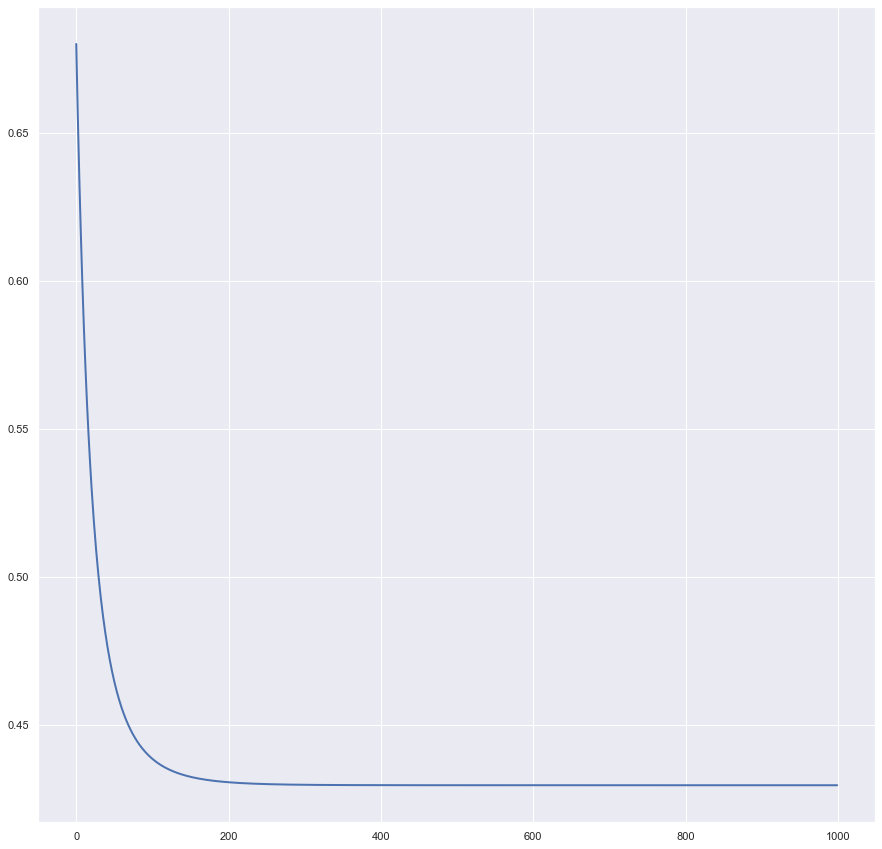

In [67]:
# print plot the cost function
plt.plot(np.arange(len(cost_history)), cost_history, lw=2)

In [68]:
# prediction
y_pre = sigmoid(np.dot(X_test, theta.T))
print(y_pre)
y_pre.shape

[[0.10245123]
 [0.47209814]
 [0.22445657]
 [0.0614172 ]
 [0.49806766]
 [0.0646094 ]
 [0.6333444 ]
 [0.1573964 ]
 [0.64194036]
 [0.06287178]
 [0.06117784]
 [0.32824529]
 [0.88871632]
 [0.13804297]
 [0.87845297]
 [0.83252505]
 [0.24461018]
 [0.10651569]
 [0.49286843]
 [0.61573451]
 [0.45544753]
 [0.06587782]
 [0.88664263]
 [0.49068812]
 [0.92747857]
 [0.056128  ]
 [0.93442528]
 [0.10592332]
 [0.33284771]
 [0.10377608]
 [0.14460426]
 [0.15850291]
 [0.48663148]
 [0.49182873]
 [0.48133625]
 [0.10750946]
 [0.49182873]
 [0.49910759]
 [0.06189853]
 [0.06117784]
 [0.09959684]
 [0.3449626 ]
 [0.05814465]
 [0.73180206]
 [0.87933848]
 [0.06189853]
 [0.46578203]
 [0.10496442]
 [0.92404855]
 [0.48351445]
 [0.34873206]
 [0.2484301 ]
 [0.73988722]
 [0.88664263]
 [0.24765423]
 [0.11220968]
 [0.05952664]
 [0.06189853]
 [0.06117784]
 [0.93076528]
 [0.0638593 ]
 [0.15411456]
 [0.06361107]
 [0.64103737]
 [0.49900658]
 [0.73343177]
 [0.64485711]
 [0.32732872]
 [0.48029784]
 [0.87255983]
 [0.63912074]
 [0.06

(418, 1)

In [69]:
y_pred_final = []
for i in y_pre:
    if i >= 0.5:
        y_pred_final.append(1)
    else:
        y_pred_final.append(0)
print(y_pred_final)

[0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 

In [70]:
submission = {'PassengerId':ID,'Survived':y_pred_final}
submission = pd.DataFrame(submission)
submission.to_csv("Submission.csv", index=False)

In [71]:
r = pd.read_csv('submission.csv')
r['PassengerId']=r['PassengerId'].astype(int)
r.to_csv("submission.csv",header =['PassengerId','Survived'],index=False)
r = pd.read_csv('submission.csv')
r

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
